# Esercitazione 4a settimana - Fisica Computazionale

## **Dinamica del punto materiale: piano inclinato, attrito, moto 2D in presenza di forze**

## **Esercizio 1. Piano inclinato**

Il varo è il momento in cui una nave [viene fatta entrare in acqua](https://i.pinimg.com/originals/78/a6/ce/78a6ce6caae8b01c667a6ebae110a3a5.gif). In alcuni casi, la nave viene costruita su una rampa inclinata, e lasciata scivolare in mare a lavori ultimati.

Considera:
- una nave di massa pari a $10^4$ tonnellate,
- su una rampa lunga $100\ m$,
- con coefficiente di attrito statico $\mu_s=0.1$ (l'attrito viene ridotto lubrificando la rampa).

1) quale deve essere l'angolo minimo della rampa in modo che la nave possa scivolare in acqua?

2) Per evitare la formazione di onde violente nel porto, si stima che la velocità di ingresso in acqua della nave non debba superare i 15 m/s. Qual è quindi l'angolo massimo della rampa perché questa condizione sia rispettata?

Calcola i risultati in assenza e in presenza di attrito dinamico ($\mu_d=0.7$).

## Soluzione numerica: **il metodo di bisezione**

Il metodo di bisezione ci permette di trovare, sotto alcune condizioni, lo zero di una funzione, cioè il valore per cui una funzione si annulla: è quindi molto utile quando le equazioni non sono risolvibili analiticamente.

## Esempio

0 10
0 5.0
0 2.5
1.25 2.5
1.875 2.5
1.875 2.1875
1.875 2.03125
1.953125 2.03125
1.9921875 2.03125
1.9921875 2.01171875
1.9921875 2.001953125
1.9970703125 2.001953125
1.99951171875 2.001953125
1.99951171875 2.000732421875


(0.0, 10.0)

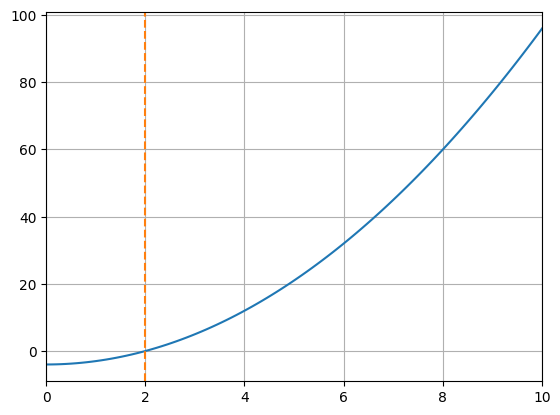

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def algoritmo_bisezione(f, x1, x2, risoluzione=0.001):    # f è una funzione!
    # alcune accortezze
    if x2 <= x1:
        print('x2 must be greater than x1')
        return
    elif f(x1)*f(x2) >= 0:
        print('f(x1) and f(x2) must have opposite signs')
        return
    else:
        xm = (x1+x2)/2
        while x2-x1 > risoluzione:
            print(x1,x2)            # scommenta per stampare le varie iterazioni
            xm = (x1+x2)/2
            if f(xm)*f(x1) >= 0:
                x1 = xm
            else:
                x2 = xm
        return xm

# esempio
def parabola(x):
    return x**2-4

x1, x2 = 0, 10
xs = np.linspace(x1, x2, 100)
plt.plot(xs, parabola(xs))
plt.axvline(x=algoritmo_bisezione(parabola, x1, x2), ls='--', color='tab:orange')
plt.grid()
plt.xlim(x1, x2)



Immaginiamo di voler risolvere il punto 2. dell'esercizio del piano inclinato. Vogliamo cioè trovare l'angolo $\theta_{MAX}$, quello per cui la velocità di ingresso in acqua è esattamente uguale al valore critico di 10 m/s. Vogliamo cioè risolvere l'equazione (vedi sopra):

$$\sqrt{g\cdot\sin x\cdot{2\cdot 100}}=15\quad(*)$$ 

Per usare l'algoritmo di bisezione dobbiamo però definire la funzione di cui vogliamo trovare lo *zero*! Definiamo allora $f(x)$ come:
$$f(x) \equiv \sqrt{9.81\cdot\sin x\cdot{2\cdot 100}}-15$$
in questo modo trovare il valore per cui $f(x)=0$ equivale a trovare una soluzione per l'equazione (*).

## **Esercizio 2. Moto rettilineo di un corpo con massa variabile**

Tratto da "Physics for Scientists and Engineers", 6th Edition, esercizio 11 cap. 5:

_Suppose a truck loaded with sand accelerates along a highway. If the driving force on the truck remains constant, what happens to the truck’s acceleration if its trailer leaks sand at a constant rate through a hole in its bottom?_

Sapendo che:
- il camion da vuoto pesa 10 tonnellate e sta trasportando 20 tonnellate di sabbia, 
- il camion perde $3\ m^3$ di sabbia ogni minuto,
- il camion accelera, da una velocità iniziale di $50\ km/h$ ad una finale di $140\ km/h$ (quando l'autista si accorge che c'è un problema) esercitando una forza di $5\ kN$, 
- la sabbia ha una densità di $\rho=1.5\ ton/m^3$.

Trova:
- la distanza percorsa tra istante iniziale e finale,
- il tempo trascorso,
- la sabbia persa lungo la strada.

**Risolvere matematicamente questo problema non è banale** perché l'accelerazione non è costante! Trova quindi una soluzione numerica con il metodo di Eulero.

**Ricorda che:** per trovare l'accelerazione puoi sempre usare la legge di Newton: $\quad F=ma$